In [88]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [89]:
df=pd.read_csv(r"C:\Users\KAUSHAL\Desktop\New folder (2)\large_art_ecommerce_dataset.csv")

In [90]:
df.head()

,Name of Painter,Subject of Painting,Style,Medium,Size,Frame,Location,Price ($),Delivery (days),Shipment,Color Palette,Copy or Original,Print or Real,Recommended Environment,Mood/Atmosphere,Theme/Lighting Requirements,Reproduction Type,Target Audience
0,Noah,Seascape,Abstract Expressionism,Watercolor,"20""x30""",Yes,Chicago,459,6,Free Shipping,Neutral Tones,Original,Print,Bedroom,Calming,Natural Light,Screen Print,Corporate Clients
1,Vincent,Abstract,Abstract Expressionism,Charcoal,"20""x30""",No,Miami,657,6,Free Shipping,Cool Tones,Original,Print,Living Room,Relaxing,Natural Light,NaN,Corporate Clients
2,Ava,Still Life,Modern,Watercolor,"18""x24""",No,Miami,907,7,Standard,Cool Tones,Original,Real,Kid Room,Joyful,Natural Light,NaN,Corporate Clients
3,Liam,Wildlife,Cubism,Acrylic,"18""x24""",No,Calgary,649,3,Standard,Oceanic Tones,Original,Real,Office,Reflective,Bright Light,Lithograph,Young Professionals
4,Olivia,Landscape,Abstract Expressionism,Charcoal,"30""x40""",Yes,Miami,539,5,Free Shipping,Earthy Tones,Copy,Print,Office,Energetic,Bright Light,Lithograph,Corporate Clients


In [91]:
# Cell 3: Exploratory Data Analysis
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Statistical summary
df.describe()

Missing values per column:
Name of Painter                  0
Subject of Painting              0
Style                            0
Medium                           0
Size                             0
Frame                            0
Location                         0
Price ($)                        0
Delivery (days)                  0
Shipment                         0
Color Palette                    0
Copy or Original                 0
Print or Real                    0
Recommended Environment          0
Mood/Atmosphere                  0
Theme/Lighting Requirements      0
Reproduction Type              677
Target Audience                  0
dtype: int64


,Price ($),Delivery (days)
count,2500.000000,2500.000000
mean,576.781200,6.482400
std,257.831587,2.282581
min,127.000000,3.000000
25%,344.000000,4.000000
50%,640.000000,7.000000
75%,813.000000,8.000000
max,975.000000,10.000000


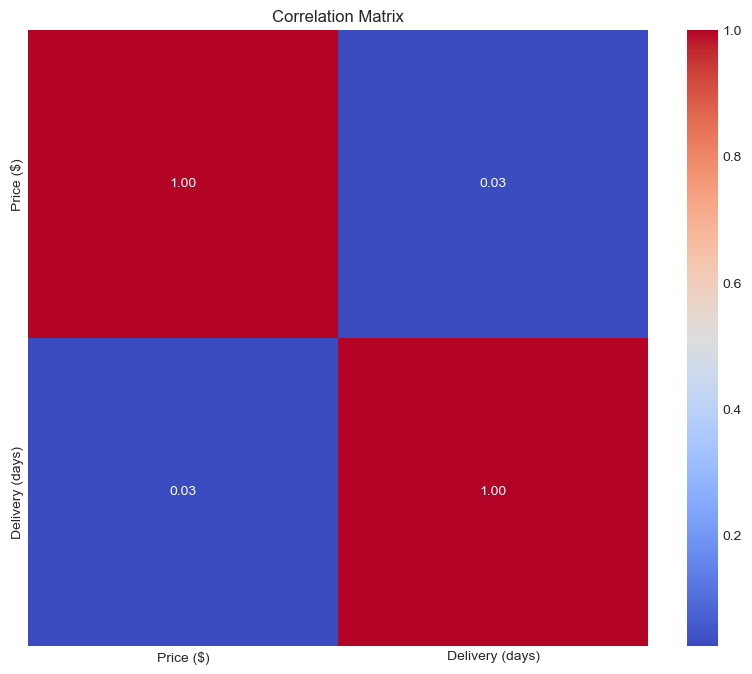

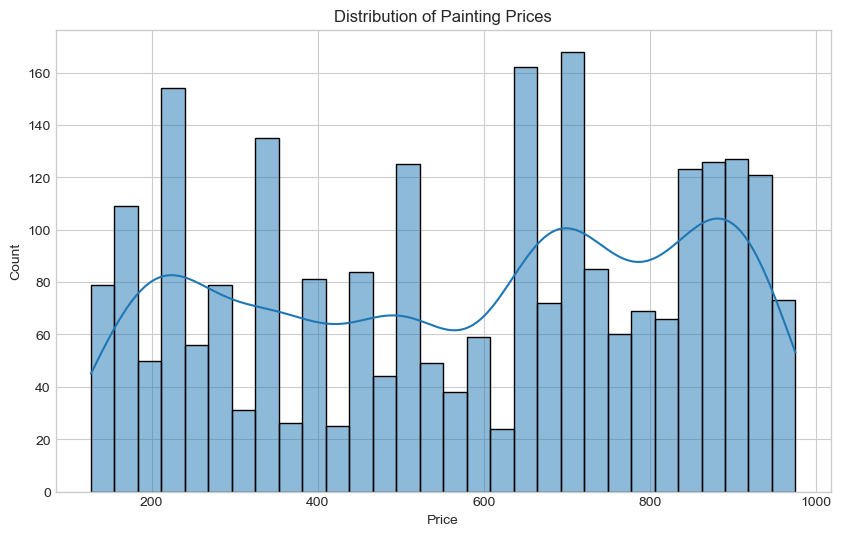

In [92]:
# Cell 4: Visualize the data
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price ($)'], bins=30, kde=True)
plt.title('Distribution of Painting Prices')
plt.xlabel('Price')
plt.show()

In [93]:
# Cell 5: Data preprocessing
# Handle missing values if any
df = df.dropna()

# Convert categorical variables to numerical using one-hot encoding if needed
# For example, if you have 'artist_style' as a categorical variable:
# df = pd.get_dummies(df, columns=['artist_style'], drop_first=True)

In [94]:
# Cell 6: Define features and target variable
# Assuming 'Price ($)' is the target column and all others are features
# Modify this according to your dataset
X = df.drop('Price ($)', axis=1)
y = df['Price ($)']

# Print feature names for reference
print("Features used for prediction:", X.columns.tolist())

Features used for prediction: ['Name of Painter', 'Subject of Painting', 'Style', 'Medium', 'Size', 'Frame', 'Location', 'Delivery (days)', 'Shipment', 'Color Palette', 'Copy or Original', 'Print or Real', 'Recommended Environment', 'Mood/Atmosphere', 'Theme/Lighting Requirements', 'Reproduction Type', 'Target Audience']


In [95]:
# Cell 7: Feature scaling
# Convert categorical variables to numerical using one-hot encoding
# Get list of categorical columns (object dtype)
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Now scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Show the scaled features
X_scaled.head()

,Delivery (days),Name of Painter_Claude,Name of Painter_Emma,Name of Painter_Frida,Name of Painter_Jija,Name of Painter_Leonardo,Name of Painter_Liam,Name of Painter_Noah,Name of Painter_Olivia,Name of Painter_Pablo,...,Mood/Atmosphere_Relaxing,Theme/Lighting Requirements_Dim Light,Theme/Lighting Requirements_Natural Light,Reproduction Type_Giclée,Reproduction Type_Lithograph,Reproduction Type_Screen Print,Target Audience_Corporate Clients,Target Audience_Families,Target Audience_Interior Designers,Target Audience_Young Professionals
0,-0.206916,-0.303761,-0.31018,-0.318607,-0.337079,-0.314412,-0.316514,3.169935,-0.328948,-0.315464,...,-0.508044,-0.692609,1.387863,-0.602910,-0.720532,1.422398,1.985039,-0.490897,-0.526788,-0.477084
1,-1.513641,-0.303761,-0.31018,-0.318607,-0.337079,-0.314412,3.159419,-0.315464,-0.328948,-0.315464,...,-0.508044,-0.692609,-0.720532,-0.602910,1.387863,-0.703038,-0.503768,-0.490897,-0.526788,2.096066
2,-0.642491,-0.303761,-0.31018,-0.318607,-0.337079,-0.314412,-0.316514,-0.315464,3.039996,-0.315464,...,-0.508044,-0.692609,-0.720532,-0.602910,1.387863,-0.703038,1.985039,-0.490897,-0.526788,-0.477084
3,-1.078066,-0.303761,-0.31018,3.138661,-0.337079,-0.314412,-0.316514,-0.315464,-0.328948,-0.315464,...,1.968332,-0.692609,1.387863,-0.602910,1.387863,-0.703038,-0.503768,2.037086,-0.526788,-0.477084
4,-1.078066,-0.303761,-0.31018,-0.318607,2.966661,-0.314412,-0.316514,-0.315464,-0.328948,-0.315464,...,-0.508044,-0.692609,1.387863,1.658623,-0.720532,-0.703038,-0.503768,-0.490897,1.898298,-0.477084


In [96]:
# Cell 8: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1458, 63)
Testing set size: (365, 63)


In [103]:
# Cell 9: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
#print accuracy
print("Training accuracy:", model.score(X_train, y_train))
print("Testing accuracy:", model.score(X_test, y_test))



# Display the model coefficients
coefficients = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_
})
print("Intercept:", model.intercept_)
coefficients.sort_values(by='Coefficient', ascending=False)

Training accuracy: 0.03921322469356725
Testing accuracy: -0.008703953839616752
Intercept: 576.7726507211894


,Feature,Coefficient
56,Reproduction Type_Giclée,27.498565
58,Reproduction Type_Screen Print,18.328796
50,Mood/Atmosphere_Energetic,15.301046
41,Color Palette_Neutral Tones,14.879338
57,Reproduction Type_Lithograph,14.290641
...,...,...
1,Name of Painter_Claude,-12.773278
11,Subject of Painting_Fantasy,-13.409362
34,Location_Montreal,-13.840145
12,Subject of Painting_Landscape,-15.715270


In [98]:
# Cell 10: Make predictions on the test set
y_pred = model.predict(X_test)

# Create a dataframe to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Difference': y_test - y_pred
})
comparison_df.head(10)

,Actual,Predicted,Difference
771,528,619.655422,-91.655422
2379,290,568.904694,-278.904694
395,161,549.126777,-388.126777
1014,640,551.029977,88.970023
1237,581,634.965543,-53.965543
863,868,584.001948,283.998052
1402,130,592.572393,-462.572393
836,368,556.530087,-188.530087
941,825,513.220352,311.779648
828,909,620.512854,288.487146


In [99]:
# Cell 11: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 67965.52
Root Mean Squared Error: 260.70
R-squared: -0.0087


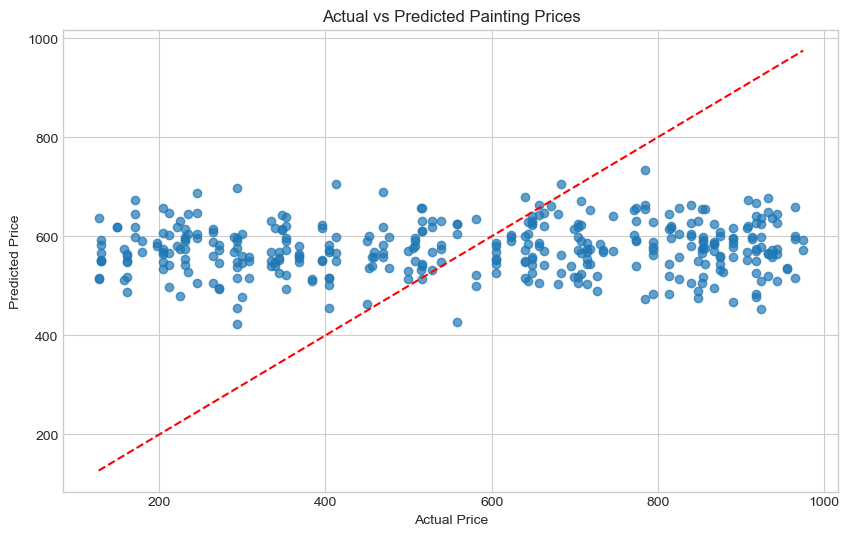

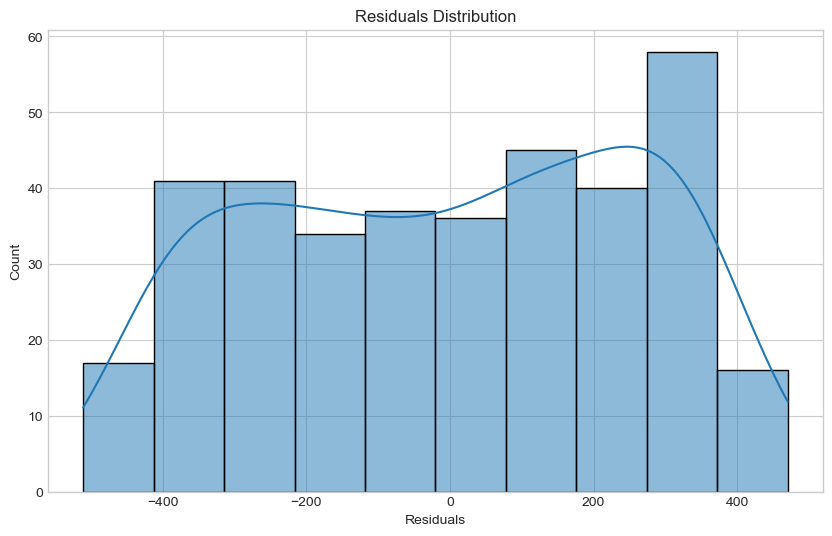

In [100]:
# Cell 12: Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Painting Prices')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

In [101]:
# Cell 13: Predict the price of new paintings
# Create a new painting with features matching our model's expected input

# First, create a dataframe with the same structure as X_encoded (with all dummy columns)
# We'll start with a single row with all zeros
new_painting_df = pd.DataFrame(0, index=[0], columns=X_encoded.columns)

# Now set values for the features we want to specify
new_painting_df['Delivery (days)'] = 5  # 5-day delivery
new_painting_df['Size_30"x40"'] = 1  # Size is 30"x40"
new_painting_df['Medium_Oil'] = 1  # Oil painting
new_painting_df['Style_Modern'] = 1  # Modern style
new_painting_df['Subject of Painting_Portrait'] = 1  # Portrait
new_painting_df['Name of Painter_Leonardo'] = 1  # Painter is Leonardo
new_painting_df['Frame_Yes'] = 1  # Has a frame
new_painting_df['Location_New York'] = 1  # Location is New York
new_painting_df['Color Palette_Warm Tones'] = 1  # Warm tones
new_painting_df['Copy or Original_Original'] = 1  # Original painting
new_painting_df['Print or Real_Real'] = 1  # Real painting

# Scale the features using the same scaler
new_painting_scaled = scaler.transform(new_painting_df)

# Predict the price
predicted_price = model.predict(new_painting_scaled)
print(f'Predicted Price for the New Painting: ${predicted_price[0]:.2f}')


Predicted Price for the New Painting: $591.92


c:\Users\KAUSHAL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [104]:
#save pkl model
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_encoded.columns, 'columns.pkl')


['columns.pkl']